<a href="https://colab.research.google.com/github/saloni1901/assignments/blob/master/stores_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
#load dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
store = pd.read_csv("stores.csv")
feature = pd.read_csv("features.csv")

In [138]:
test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
2,1,3,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
3,1,4,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
4,1,5,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115060,45,94,2013-07-26,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115061,45,95,2013-07-26,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115062,45,97,2013-07-26,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [97]:
#find out the shape of dataset
print('train: ', train.shape)
print('feature: ', feature.shape)
print('stores ', store.shape)

train:  (421570, 5)
feature:  (8190, 12)
stores  (45, 3)


In [98]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [99]:
train.Date.min(), train.Date.max()

('2010-02-05', '2012-10-26')

In [100]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [101]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [102]:
#Merge three csv files using inner join.
df = train.merge(feature,on=['Store','Date'] ,how='inner').merge(store, on=['Store'], how='inner')
print(df.shape)
df.head()

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [103]:
#Remove additional IsHoliday column (IsHoliday_y) and rename IsHoliday_x column to IsHoliday.
df = df.drop(['IsHoliday_y'], axis=1)
df = df.rename(columns={'IsHoliday_x':'IsHoliday'})
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [104]:
#shape of dataframe created
df.shape

(421570, 16)

In [105]:
#check for null values
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [106]:
#summary of dataframe
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [107]:
#nformation of dataframe regarding data type and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


#Exploratory Data Analysis

Text(0.5, 1.0, '45 stores weekly sales')

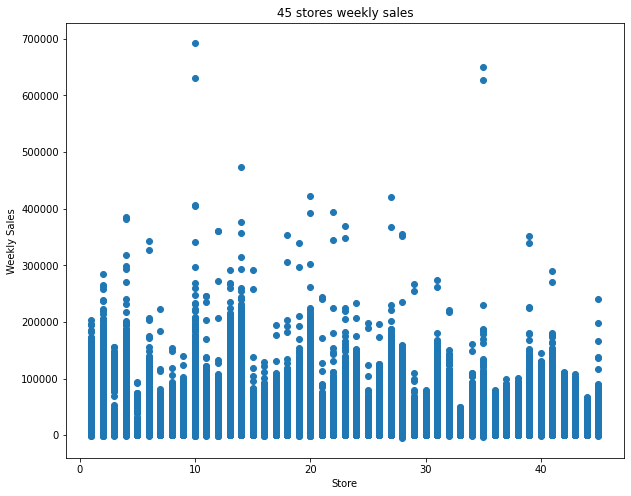

In [108]:
#45 stores weekly sales
fig = plt.figure(figsize =(10, 8))
plt.scatter(df.Store, df.Weekly_Sales)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('45 stores weekly sales')

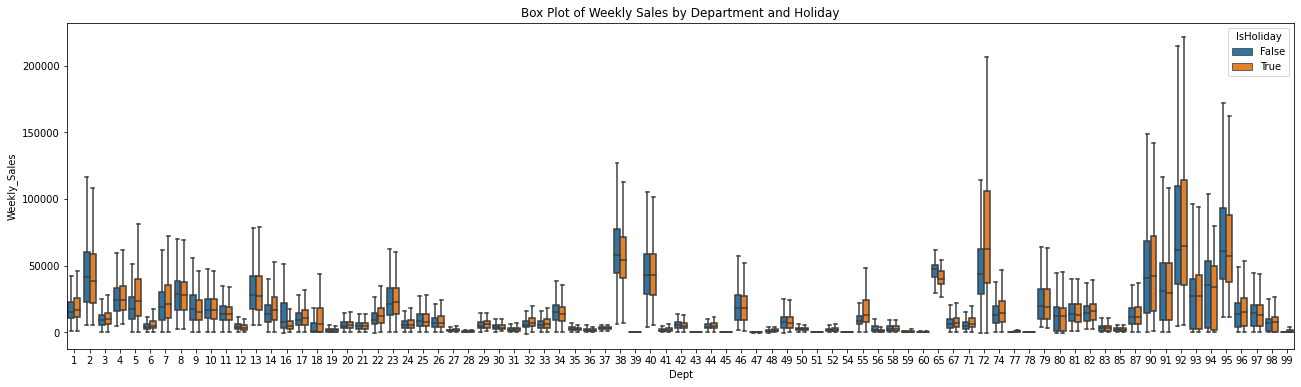

In [109]:
#weekly sales of department and holiday
data= pd.concat([df['Dept'], df['Weekly_Sales'], df['IsHoliday']], axis=1)
plt.figure(figsize=(22,6))
plt.title('Box Plot of Weekly Sales by Department and Holiday')
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

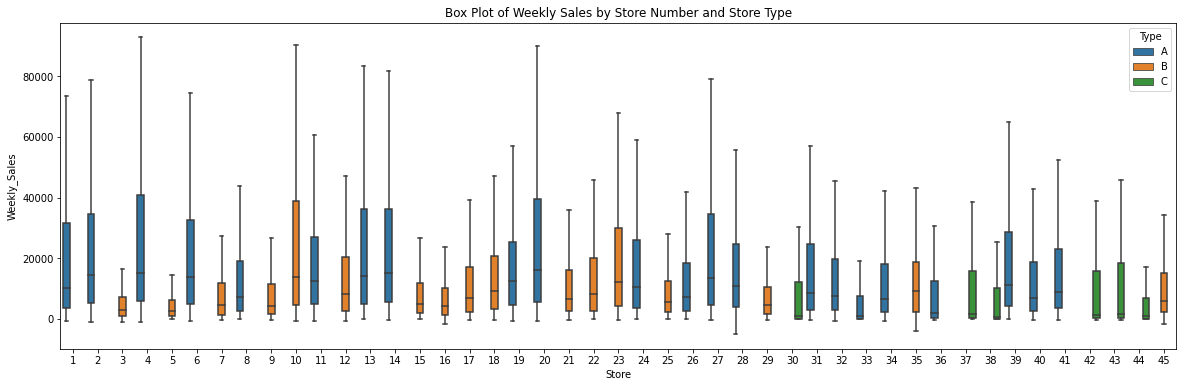

In [110]:
#Plot of Weekly Sales by Store Number and Store Type.
data_8 = pd.concat([df['Store'], df['Weekly_Sales'], df['Type']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Store Number and Store Type')
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data_8, showfliers=False, hue='Type')

Text(0.5, 1.0, 'Weekly sales as per department')

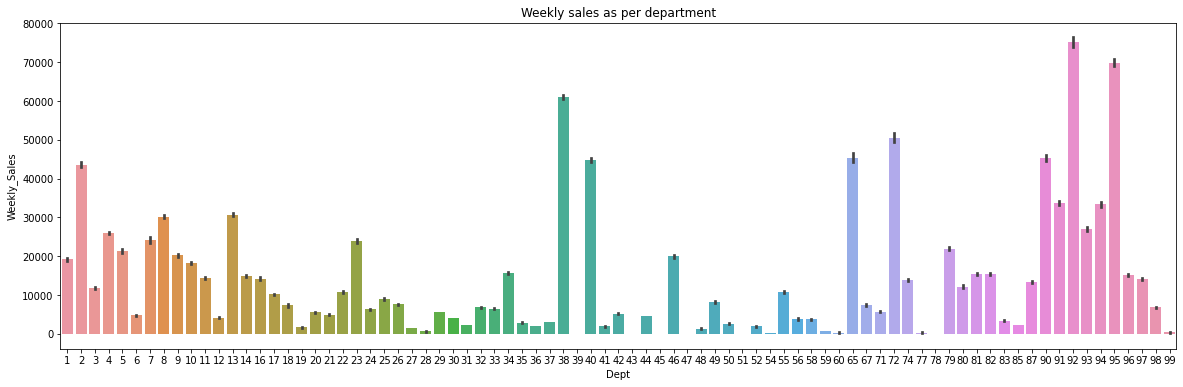

In [111]:
#Saales as per dept
fig = plt.figure(figsize =(20,6))
sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.title('Weekly sales as per department')

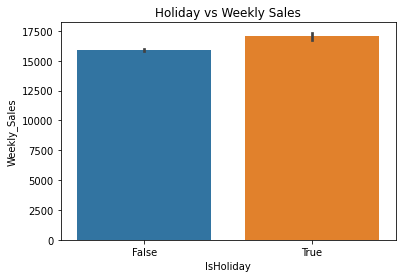

In [112]:
#holiday vs weekly sales
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Holiday vs Weekly Sales')
plt.show()

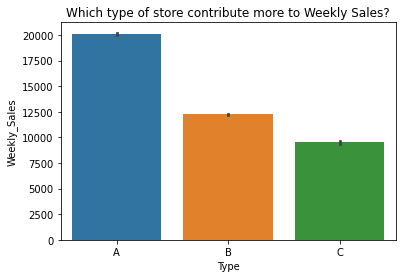

In [113]:
#store type vs weekly sales 
sns.barplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Which type of store contribute more to Weekly Sales?')
plt.show()

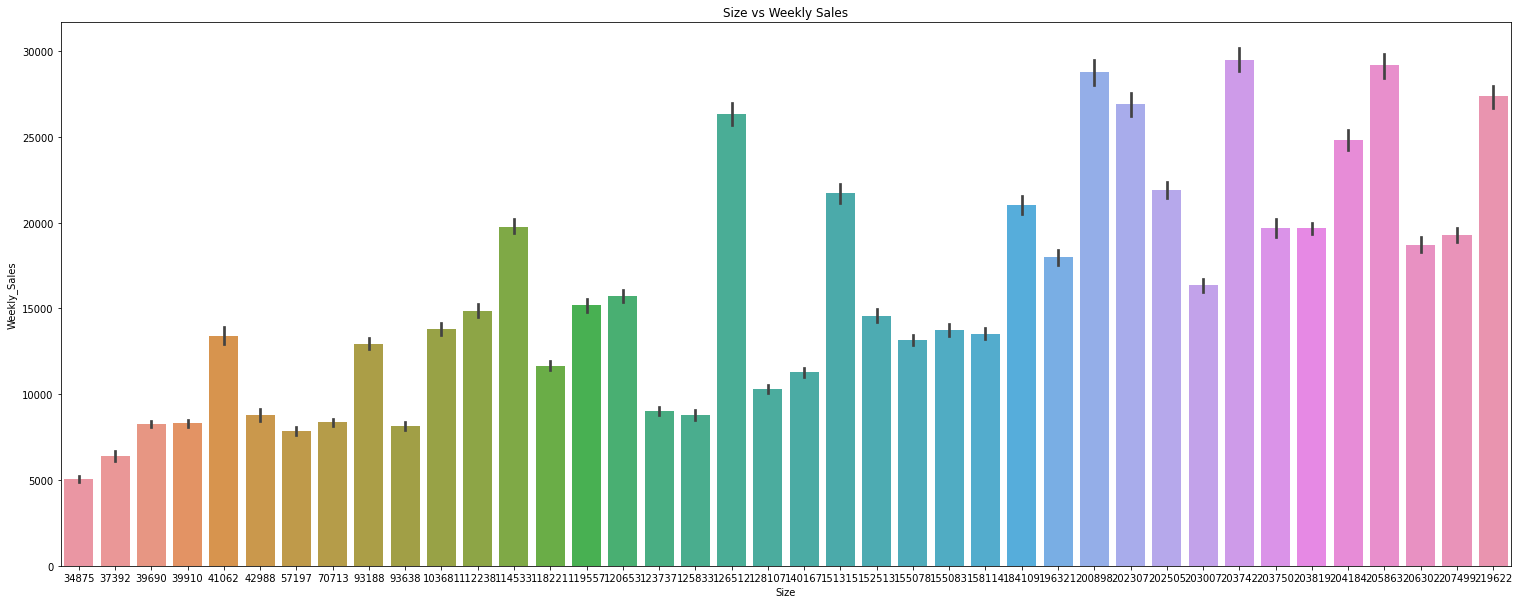

In [114]:
#size vs weekly sales
fig = plt.figure(figsize =(26,10))
sns.barplot(x='Size', y='Weekly_Sales', data=df)
plt.title('Size vs Weekly Sales')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


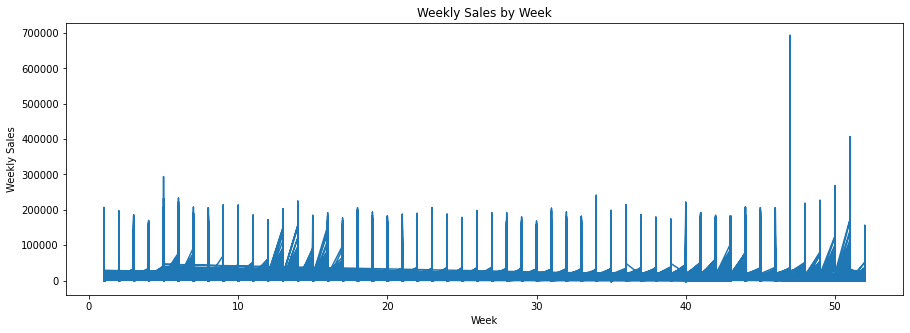

In [115]:
# First we need to get Year, Month and Week columns from Date column.
df.Date = pd.to_datetime(df.Date)
df['Year']  = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Week']  = df.Date.dt.week

#Plot of Weekly Sales and Week.
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Week')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.plot(df.Week,df.Weekly_Sales)
plt.show()

#Data preprocessing

In [116]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
dtype: int64

In [117]:
# Remove rows with null values in all columns
df.dropna(axis=0, how="all", inplace=True)
# Remove all rows with null values in all rows
df.dropna(axis=1, how="all", inplace=True)
# Fill missing values with 0
df=df.fillna(0)

In [118]:
#check for null values
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64

In [119]:
# Remove negative values as sales cannot be negative values.
df= df[df['Weekly_Sales'] >= 0]
df.shape

(420285, 19)

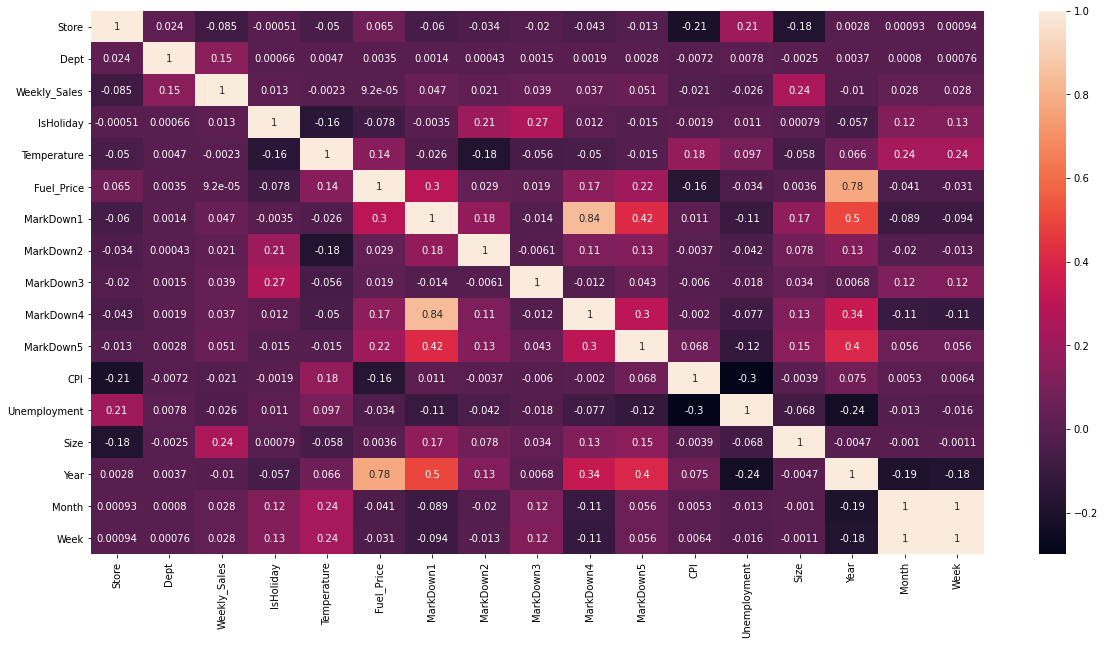

In [120]:
#heatmap to find out correlation b/w attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True)

#Time Series Modelling

#Machine Learning Models

In [121]:
#merge the 3 csv files to make a test dataset
test_stores = pd.merge(test,store)
test = pd.merge(test_stores,feature)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [122]:
#Numeric Encoding
# Converting Categorical Variable 'Type' & 'IsHoliday' into Numerical Variables.
code_numeric = {"A": 1,"B": 2,"C": 3,False: 0,True: 1}
df = df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test = test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)


In [123]:
#Train-test split data
from sklearn.model_selection import train_test_split
y = df['Weekly_Sales']
X = df.drop(['Weekly_Sales','Date'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3) #Train:CV = 70:30 splitting.

In [ ]:
#Random Forest Regressor model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)



In [127]:
y_pred = rf.predict(X_test)

In [137]:
#y_pred.DataFrame()
tf = pd.DataFrame(data=y_pred, columns=['Weekly_Sales'])
tf

,Weekly_Sales
0,181.3397
1,8461.1561
2,1318.4093
3,105765.6989
4,62.0813
...,...
126081,27511.3882
126082,88221.3821
126083,9342.3125
126084,3299.4522


In [129]:
#Evaluation parameters of Random Forest Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
print("Random Forest Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_Score:",r2_score(y_test,y_pred))
print("accuracy",r2_score(y_test,y_pred))

Random Forest Regressor
MAE: 1469.135950317244
MSE: 15422492.08168902
RMSE: 3927.1480850216253
r2_Score: 0.9708684394683053
accuracy 0.9708684394683053


In [130]:
#Decision Tree Regressor model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred_dt))
print("MSE:",mean_squared_error(y_test,y_pred_dt))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("r2_Score:",r2_score(y_test,y_pred_dt))
print("accuracy",r2_score(y_test,y_pred_dt))

Decision Tree Regressor
MAE: 1940.7417788652187
MSE: 27239897.23923367
RMSE: 5219.185495767866
r2_Score: 0.9485465311897261
accuracy 0.9485465311897261


In [131]:
#knn Regressor model
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred_knn))
print("MSE:",mean_squared_error(y_test,y_pred_knn))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print("r2_Score:",r2_score(y_test,y_pred_knn))
print("accuracy",r2_score(y_test,y_pred_dt))

KNN Regressor
MAE: 11104.661616191257
MSE: 335798758.12650156
RMSE: 18324.812635508762
r2_Score: 0.3657093939801984
accuracy 0.9485465311897261


In [132]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression")
print("MAE:",mean_absolute_error(y_test,y_pred_lr))
print("MSE:",mean_squared_error(y_test,y_pred_lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("r2_Score:",r2_score(y_test,y_pred_lr))
print("accuracy",r2_score(y_test,y_pred_dt))

Linear Regression
MAE: 14586.7300758048
MSE: 482774038.4849655
RMSE: 21972.11957197042
r2_Score: 0.08808764168836669
accuracy 0.9485465311897261


In [140]:
#check for the null values in test data
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [141]:
#fill the null values with mean value
CPI_mean = test['CPI'].mean()
Unemp_mean = test['Unemployment'].mean()
test['CPI'] = test['CPI'].fillna(CPI_mean)
test['Unemployment'] = test['Unemployment'].fillna(Unemp_mean)
test = test.fillna(0)
# Converting Date to datetime
test['Date'] = pd.to_datetime(test['Date'])
# Extract date features
test['Date_dayofweek'] = test['Date'].dt.dayofweek
test['Date_month'] = test['Date'].dt.month 
test['Date_year'] = test['Date'].dt.year
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year
0,1,1,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012
1,1,2,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012
2,1,3,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012
3,1,4,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012
4,1,5,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012


In [143]:
#Exclude Date as it throws error while making prediction.
test_ = test.loc[:, test.columns != 'Date']
model_rf = RandomForestRegressor(n_estimators=80).fit(X_train,y_train) # Fit the model with original train data.
y_pred = model_rf.predict(test_) 

In [145]:
sub = pd.DataFrame({
        "Id":test.Date.astype(str),
        "Weekly_Sales": y_pred })# This is predicetd Weekly Sales on final test data using Random Forest regression becase it has given the best accuracy on training dataset.
    
sub.to_csv('Weekly Sales Prediction.csv', index=False) 


In [146]:
sub

,Id,Weekly_Sales
0,2012-11-02,12162.068750
1,2012-11-02,18021.759000
2,2012-11-02,4920.646125
3,2012-11-02,10838.332875
4,2012-11-02,18847.293375
...,...,...
115059,2013-07-26,10053.641250
115060,2013-07-26,23512.169625
115061,2013-07-26,29075.697500
115062,2013-07-26,6849.900250
